In [ ]:
import os 
import zipfile 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import cv2
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import shutil


In [ ]:
!pip install kaggle

In [ ]:

from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ummehabibaprity","key":"3d76a655d500596f23eb966f7532e80a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d arunrk7/surface-crack-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import zipfile 
local_dir='/content/drive/MyDrive/Project/archive.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/content/drive/MyDrive/Project/extract')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Project/archive.zip' mode='r'>>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Project/extract'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Project/extract/Positive/15001_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15002_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15003_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15004_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15005_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15006_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15007_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15008_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15009_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15010_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15011_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15012_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15013_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15014_1.jpg
/content/drive/MyDrive/Project/extract/Positive/15015_1.jpg
/content/drive/MyDrive/Project/extract/Positive/1

In [ ]:
Root = '/content/drive/MyDrive/Project/extract/'
TRAIN_PATH = 'train'
os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
  src = Root + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)  

In [ ]:
processImages('Negative')
print('N Done')
processImages('Positive')
print('P Done')

N Done
P Done


In [ ]:
lr = 0.01
epochs = 2
batch_size = 20
input_size, output_size = 28 * 28, 2
hidden_size = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
print(datasets)

Using cuda device
<module 'torchvision.datasets' from '/usr/local/lib/python3.7/dist-packages/torchvision/datasets/__init__.py'>


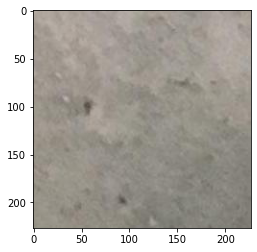

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/drive/MyDrive/Project/extract/Negative/20000.jpg'))

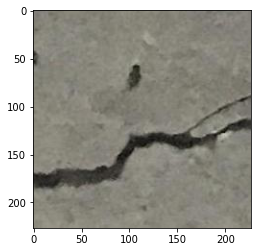

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/drive/MyDrive/Project/extract/Positive/19999.jpg'))

In [ ]:
transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()])

dataset = datasets.ImageFolder(root='/content/drive/MyDrive/Project/extract', transform=transform)

train, test = torch.utils.data.random_split(dataset, [35000, 5000])


print(len(train))
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)


print(len(test))
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True)



35000
5000


## Approach-1

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, hidden_size):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, hidden_size)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()


        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)

        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size, hidden_size, output_size)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
'''
TRAIN THE MODEL
'''

iteration_loss = []
iter = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6930769681930542. Accuracy: 50.88
Iteration: 1000. Loss: 0.6517881751060486. Accuracy: 68.72
Iteration: 1500. Loss: 0.604758620262146. Accuracy: 64.64
Iteration: 2000. Loss: 0.564117968082428. Accuracy: 75.64
Iteration: 2500. Loss: 0.5952160954475403. Accuracy: 76.52
Iteration: 3000. Loss: 0.5819596648216248. Accuracy: 76.38
Iteration: 3500. Loss: 0.3421831727027893. Accuracy: 78.06


[0.6930769681930542, 0.6517881751060486, 0.604758620262146, 0.564117968082428, 0.5952160954475403, 0.5819596648216248, 0.3421831727027893]


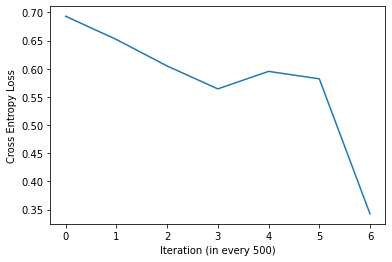

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Performence

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import zipfile
import seaborn as sns
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
preTrainedModel = model
preTrainedModel.to('cpu')
preTrainedModel.eval()
for i,(inputs, labels) in enumerate(test_loader):

  # inputs, labels = inputs.to(device), labels.to(device)
  inputs, labels = inputs, labels
  images = inputs.view(-1, 28*28)
  outputs = preTrainedModel(images)
  _, preds = torch.max(outputs, 1)
  y_true_tensor = torch.cat((y_true_tensor,labels))
  y_pred_tensor = torch.cat((y_pred_tensor,preds))
  print(i)
  # break


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [ ]:
y_true = y_true_tensor.tolist()
y_pred = y_pred_tensor.tolist()

In [ ]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[2217,  330],
       [ 767, 1686]])

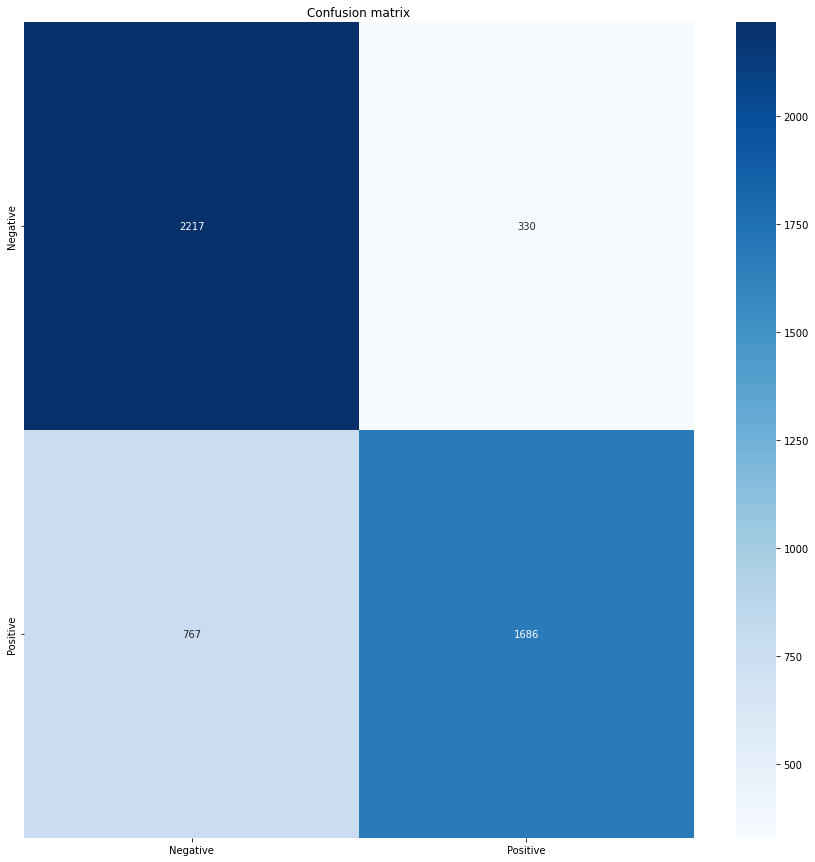

In [ ]:
target_names = list(dataset.class_to_idx.keys())
df_cm = pd.DataFrame(matrice,columns=target_names,index=target_names)
plt.figure(figsize=(15,15))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.savefig('./confusion-matrix-jpg.jpg',pad_inches=0.0,transparent=True)
plt.savefig('./confusion-matrix-png.png',pad_inches=0.0,transparent=True)
plt.show()

In [ ]:
target_names = list(dataset.class_to_idx.keys())
classify_report = classification_report(y_true, y_pred, target_names=target_names)
print(classify_report)

              precision    recall  f1-score   support

    Negative       0.74      0.87      0.80      2547
    Positive       0.84      0.69      0.75      2453

    accuracy                           0.78      5000
   macro avg       0.79      0.78      0.78      5000
weighted avg       0.79      0.78      0.78      5000



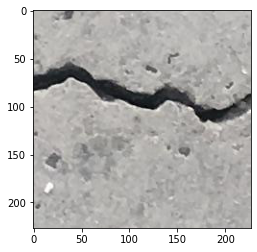

tensor([1])
Predicted class = Positive


In [ ]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name,model):
    image = Image.open(image_name)
    plt.imshow(image)
    plt.show()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    IMAGE_SIZE = 224
    classNmae = [
        "Negative",
        "Positive",
    ]
    transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()])
    ex_img = transform(image)
    model.eval()
    images = ex_img.view(-1, 28*28)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    # print(torch.max(outputs,1))
    print(preds)
    print(f"Predicted class = {classNmae[preds]}")

predict_external_image("/content/drive/MyDrive/Project/extract/Positive/19967.jpg",preTrainedModel)

## Approach-2

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

         # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size, hidden_size, output_size)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
'''
TRAIN THE MODEL
'''

iteration_loss = []
iter = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.8401538133621216. Accuracy: 49.06
Iteration: 1000. Loss: 0.7263675928115845. Accuracy: 50.94
Iteration: 1500. Loss: 0.713092565536499. Accuracy: 50.94
Iteration: 2000. Loss: 0.7046859264373779. Accuracy: 49.06
Iteration: 2500. Loss: 0.7000399827957153. Accuracy: 50.94
Iteration: 3000. Loss: 0.7007904648780823. Accuracy: 50.94
Iteration: 3500. Loss: 0.700069785118103. Accuracy: 49.06


[0.8401538133621216, 0.7263675928115845, 0.713092565536499, 0.7046859264373779, 0.7000399827957153, 0.7007904648780823, 0.700069785118103]


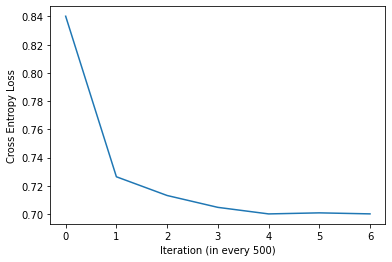

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Performence

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import zipfile
import seaborn as sns
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
preTrainedModel = model
preTrainedModel.to('cpu')
preTrainedModel.eval()
for i,(inputs, labels) in enumerate(test_loader):

  # inputs, labels = inputs.to(device), labels.to(device)
  inputs, labels = inputs, labels
  images = inputs.view(-1, 28*28)
  outputs = preTrainedModel(images)
  _, preds = torch.max(outputs, 1)
  y_true_tensor = torch.cat((y_true_tensor,labels))
  y_pred_tensor = torch.cat((y_pred_tensor,preds))
  print(i)
  # break


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [ ]:
y_true = y_true_tensor.tolist()
y_pred = y_pred_tensor.tolist()

In [ ]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[   0, 2547],
       [   0, 2453]])

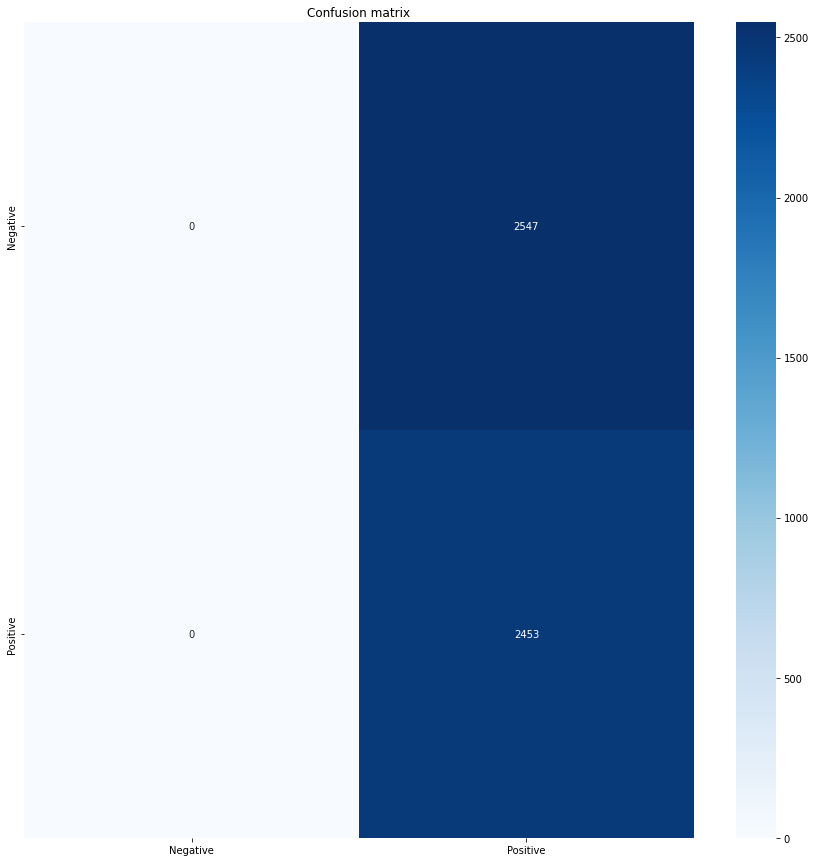

In [ ]:
target_names = list(dataset.class_to_idx.keys())
df_cm = pd.DataFrame(matrice,columns=target_names,index=target_names)
plt.figure(figsize=(15,15))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.savefig('./confusion-matrix-jpg.jpg',pad_inches=0.0,transparent=True)
plt.savefig('./confusion-matrix-png.png',pad_inches=0.0,transparent=True)
plt.show()

In [ ]:
target_names = list(dataset.class_to_idx.keys())
classify_report = classification_report(y_true, y_pred, target_names=target_names)
print(classify_report)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      2547
    Positive       0.49      1.00      0.66      2453

    accuracy                           0.49      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.24      0.49      0.32      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


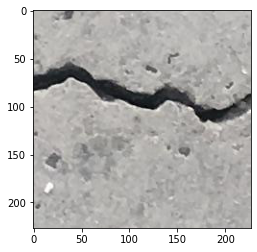

tensor([1])
Predicted class = Positive


In [ ]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name,model):
    image = Image.open(image_name)
    plt.imshow(image)
    plt.show()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    IMAGE_SIZE = 224
    classNmae = [
        "Negative",
        "Positive",
    ]
    transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()])
    ex_img = transform(image)
    model.eval()
    images = ex_img.view(-1, 28*28)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    # print(torch.max(outputs,1))
    print(preds)
    print(f"Predicted class = {classNmae[preds]}")

predict_external_image("/content/drive/MyDrive/Project/extract/Positive/19967.jpg",preTrainedModel)

## Approach-3

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

         # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

In [ ]:
model = DeepNeuralNetworkModel(input_size, hidden_size, output_size)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
'''
TRAIN THE MODEL
'''

iteration_loss = []
iter = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6585897207260132. Accuracy: 51.94
Iteration: 1000. Loss: 0.6353005170822144. Accuracy: 76.26
Iteration: 1500. Loss: 0.2975139915943146. Accuracy: 75.18
Iteration: 2000. Loss: 0.45958971977233887. Accuracy: 84.02
Iteration: 2500. Loss: 0.38507238030433655. Accuracy: 84.44
Iteration: 3000. Loss: 0.2471560537815094. Accuracy: 86.78
Iteration: 3500. Loss: 0.30778560042381287. Accuracy: 85.54


[0.6585897207260132, 0.6353005170822144, 0.2975139915943146, 0.45958971977233887, 0.38507238030433655, 0.2471560537815094, 0.30778560042381287]


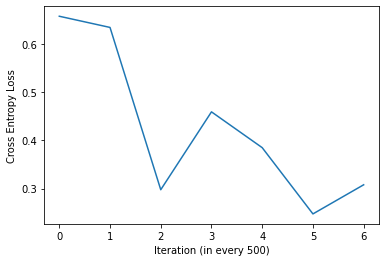

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Performence

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import zipfile
import seaborn as sns
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
preTrainedModel = model
preTrainedModel.to('cpu')
preTrainedModel.eval()
for i,(inputs, labels) in enumerate(test_loader):

  # inputs, labels = inputs.to(device), labels.to(device)
  inputs, labels = inputs, labels
  images = inputs.view(-1, 28*28)
  outputs = preTrainedModel(images)
  _, preds = torch.max(outputs, 1)
  y_true_tensor = torch.cat((y_true_tensor,labels))
  y_pred_tensor = torch.cat((y_pred_tensor,preds))
  print(i)
  # break


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [ ]:
y_true = y_true_tensor.tolist()
y_pred = y_pred_tensor.tolist()

In [ ]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[2487,   60],
       [ 663, 1790]])

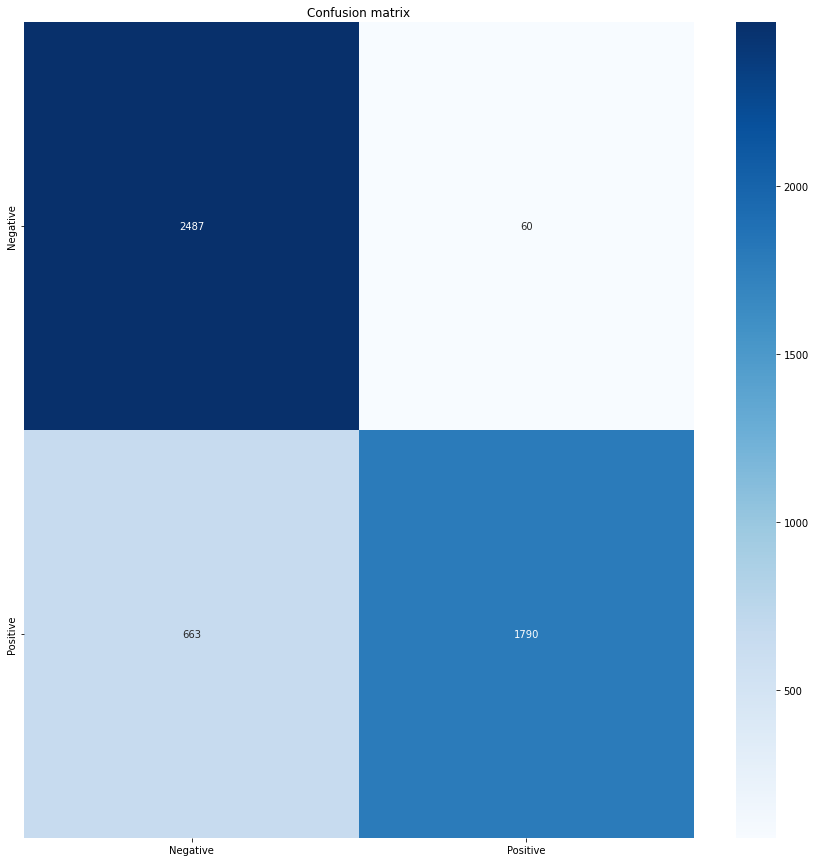

In [ ]:
target_names = list(dataset.class_to_idx.keys())
df_cm = pd.DataFrame(matrice,columns=target_names,index=target_names)
plt.figure(figsize=(15,15))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.savefig('./confusion-matrix-jpg.jpg',pad_inches=0.0,transparent=True)
plt.savefig('./confusion-matrix-png.png',pad_inches=0.0,transparent=True)
plt.show()

In [ ]:
target_names = list(dataset.class_to_idx.keys())
classify_report = classification_report(y_true, y_pred, target_names=target_names)
print(classify_report)

              precision    recall  f1-score   support

    Negative       0.79      0.98      0.87      2547
    Positive       0.97      0.73      0.83      2453

    accuracy                           0.86      5000
   macro avg       0.88      0.85      0.85      5000
weighted avg       0.88      0.86      0.85      5000



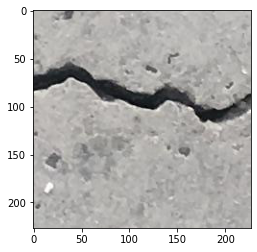

tensor([1])
Predicted class = Positive


In [ ]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name,model):
    image = Image.open(image_name)
    plt.imshow(image)
    plt.show()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    IMAGE_SIZE = 224
    classNmae = [
        "Negative",
        "Positive",
    ]
    transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()])
    ex_img = transform(image)
    model.eval()
    images = ex_img.view(-1, 28*28)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    # print(torch.max(outputs,1))
    print(preds)
    print(f"Predicted class = {classNmae[preds]}")

predict_external_image("/content/drive/MyDrive/Project/extract/Positive/19967.jpg",preTrainedModel)

## Approach-4

In [ ]:
learning_rate=0.01
num_classes=2

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),      #in_channels, out_channels ,
            nn.BatchNorm2d(16),                           #Batch normalisation is a mechanism that is used to improve efficiency of neural networks
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

In [ ]:
# Train the model
iteration_loss = []

num_epochs=10
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
       
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 500 == 0:
           iteration_loss.append(loss.item())
           print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [500/1750], Loss: 0.6270
Epoch [1/10], Step [1000/1750], Loss: 0.6219
Epoch [1/10], Step [1500/1750], Loss: 0.6951
Epoch [2/10], Step [500/1750], Loss: 0.6313
Epoch [2/10], Step [1000/1750], Loss: 0.6429
Epoch [2/10], Step [1500/1750], Loss: 0.5879
Epoch [3/10], Step [500/1750], Loss: 0.5885
Epoch [3/10], Step [1000/1750], Loss: 0.6439
Epoch [3/10], Step [1500/1750], Loss: 0.6233
Epoch [4/10], Step [500/1750], Loss: 0.6765
Epoch [4/10], Step [1000/1750], Loss: 0.6223
Epoch [4/10], Step [1500/1750], Loss: 0.6144
Epoch [5/10], Step [500/1750], Loss: 0.7172
Epoch [5/10], Step [1000/1750], Loss: 0.6078
Epoch [5/10], Step [1500/1750], Loss: 0.6133
Epoch [6/10], Step [500/1750], Loss: 0.6081
Epoch [6/10], Step [1000/1750], Loss: 0.6163
Epoch [6/10], Step [1500/1750], Loss: 0.5818
Epoch [7/10], Step [500/1750], Loss: 0.5684
Epoch [7/10], Step [1000/1750], Loss: 0.5787
Epoch [7/10], Step [1500/1750], Loss: 0.5745
Epoch [8/10], Step [500/1750], Loss: 0.6171
Epoch [8/10], Step

In [ ]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 61.2 %


[0.6270259618759155, 0.6219383478164673, 0.6950777769088745, 0.6312828063964844, 0.6428924798965454, 0.5878802537918091, 0.5884507894515991, 0.6439428329467773, 0.6232950091362, 0.676529049873352, 0.6223229765892029, 0.6143621206283569, 0.7171979546546936, 0.6078401207923889, 0.613326907157898, 0.6080743670463562, 0.6162770986557007, 0.5818048715591431, 0.5684224367141724, 0.5787213444709778, 0.5745171308517456, 0.617057204246521, 0.5924429893493652, 0.6170872449874878, 0.698099672794342, 0.6365123391151428, 0.5765233039855957, 0.6440080404281616, 0.5756152272224426, 0.6431008577346802]


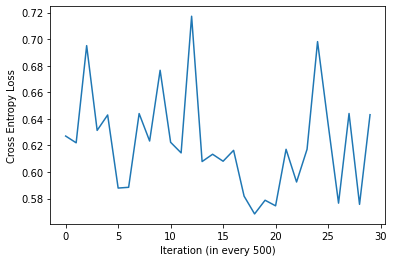

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

### Performence

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import zipfile
import seaborn as sns
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
preTrainedModel = model
preTrainedModel.to('cpu')
preTrainedModel.eval()
for i,(inputs, labels) in enumerate(test_loader):

  # inputs, labels = inputs.to(device), labels.to(device)
  inputs, labels = inputs, labels
  images = inputs.view(-1, 28*28)
  outputs = preTrainedModel(images)
  _, preds = torch.max(outputs, 1)
  y_true_tensor = torch.cat((y_true_tensor,labels))
  y_pred_tensor = torch.cat((y_pred_tensor,preds))
  print(i)
  # break


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [ ]:
y_true = y_true_tensor.tolist()
y_pred = y_pred_tensor.tolist()

In [ ]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[2217,  330],
       [ 767, 1686]])

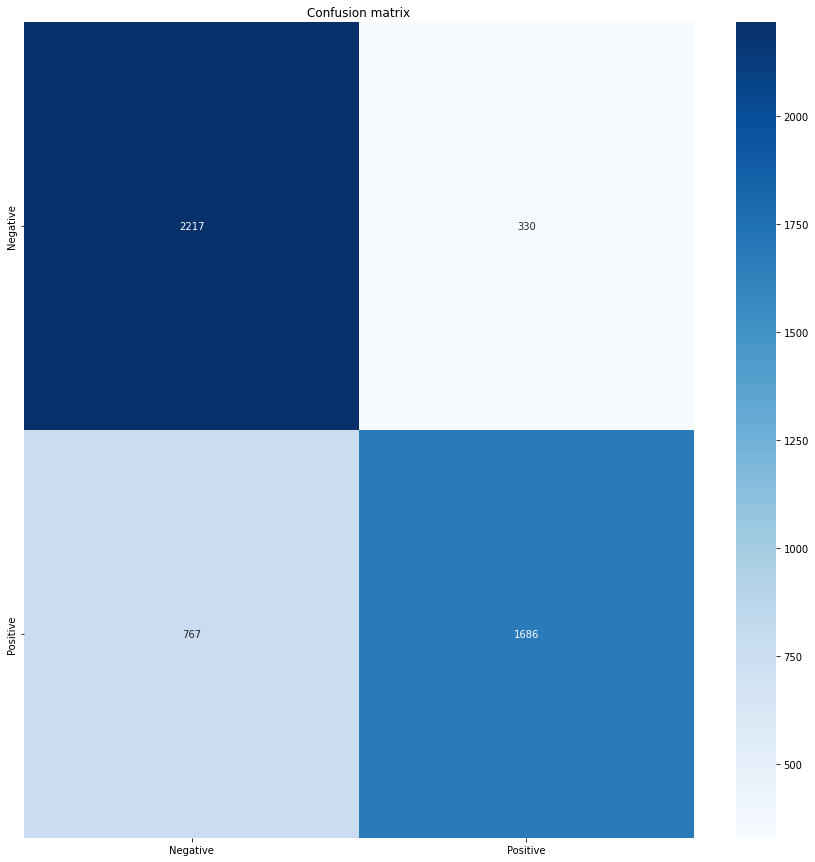

In [ ]:
target_names = list(dataset.class_to_idx.keys())
df_cm = pd.DataFrame(matrice,columns=target_names,index=target_names)
plt.figure(figsize=(15,15))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.savefig('./confusion-matrix-jpg.jpg',pad_inches=0.0,transparent=True)
plt.savefig('./confusion-matrix-png.png',pad_inches=0.0,transparent=True)
plt.show()

In [ ]:
target_names = list(dataset.class_to_idx.keys())
classify_report = classification_report(y_true, y_pred, target_names=target_names)
print(classify_report)

              precision    recall  f1-score   support

    Negative       0.74      0.87      0.80      2547
    Positive       0.84      0.69      0.75      2453

    accuracy                           0.78      5000
   macro avg       0.79      0.78      0.78      5000
weighted avg       0.79      0.78      0.78      5000



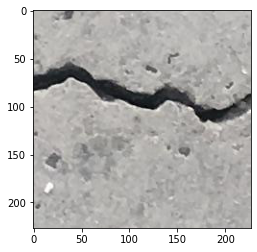

tensor([1])
Predicted class = Positive


In [ ]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name,model):
    image = Image.open(image_name)
    plt.imshow(image)
    plt.show()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    IMAGE_SIZE = 224
    classNmae = [
        "Negative",
        "Positive",
    ]
    transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()])
    ex_img = transform(image)
    model.eval()
    images = ex_img.view(-1, 28*28)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    # print(torch.max(outputs,1))
    print(preds)
    print(f"Predicted class = {classNmae[preds]}")

predict_external_image("/content/drive/MyDrive/Project/extract/Positive/19967.jpg",preTrainedModel)

## Approach-5

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_size,
                                num_classes=output_size)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.30741798877716064. Accuracy: 87.8
Iteration: 1000. Loss: 0.15332597494125366. Accuracy: 82.76
Iteration: 1500. Loss: 0.4541182518005371. Accuracy: 88.6
Iteration: 2000. Loss: 0.9734708666801453. Accuracy: 78.26
Iteration: 2500. Loss: 0.1500563621520996. Accuracy: 87.18
Iteration: 3000. Loss: 0.362361341714859. Accuracy: 88.14
Iteration: 3500. Loss: 0.22810308635234833. Accuracy: 88.26


[0.30741798877716064, 0.15332597494125366, 0.4541182518005371, 0.9734708666801453, 0.1500563621520996, 0.362361341714859, 0.22810308635234833]


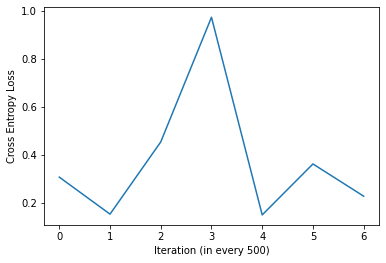

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

## Performance

In [ ]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import zipfile
import seaborn as sns
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from torch.utils.data import random_split
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
preTrainedModel = model
preTrainedModel.to('cpu')
preTrainedModel.eval()
for i,(inputs, labels) in enumerate(test_loader):

  # inputs, labels = inputs.to(device), labels.to(device)
  inputs, labels = inputs, labels
  images = inputs.view(-1, 28*28)
  logits, probas = preTrainedModel(images)
  _, preds = torch.max(probas, 1)
  y_true_tensor = torch.cat((y_true_tensor,labels))
  y_pred_tensor = torch.cat((y_pred_tensor,preds))
  print(i)
  # break


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [ ]:
y_true = y_true_tensor.tolist()
y_pred = y_pred_tensor.tolist()

In [ ]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[2279,  268],
       [ 319, 2134]])

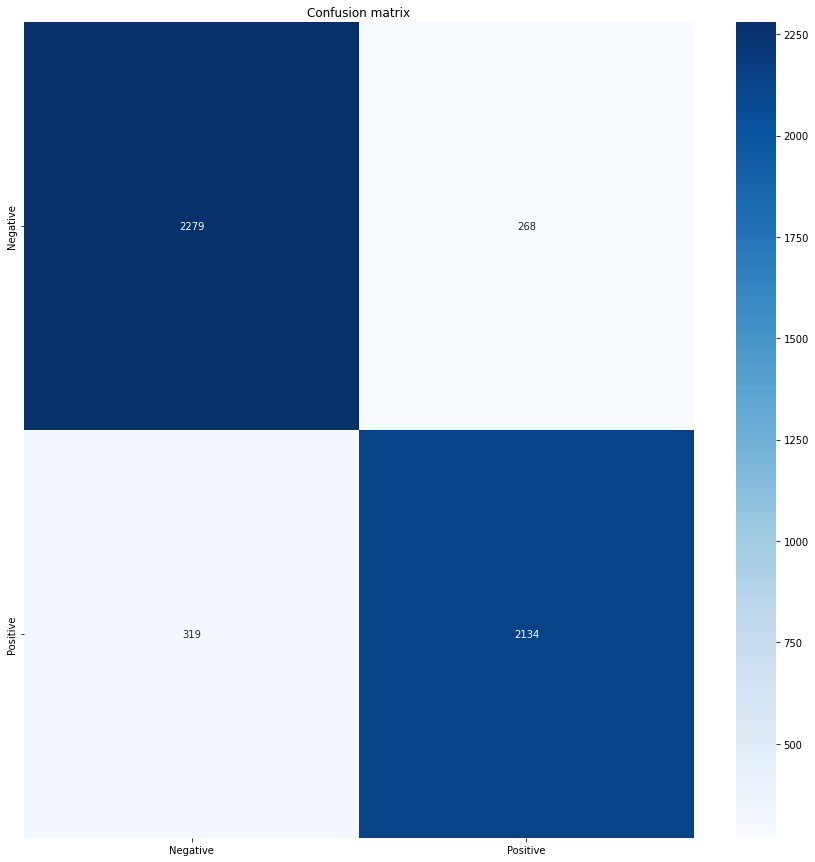

In [ ]:
target_names = list(dataset.class_to_idx.keys())
df_cm = pd.DataFrame(matrice,columns=target_names,index=target_names)
plt.figure(figsize=(15,15))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.savefig('./confusion-matrix-jpg.jpg',pad_inches=0.0,transparent=True)
plt.savefig('./confusion-matrix-png.png',pad_inches=0.0,transparent=True)
plt.show()

In [ ]:
target_names = list(dataset.class_to_idx.keys())
classify_report = classification_report(y_true, y_pred, target_names=target_names)
print(classify_report)

              precision    recall  f1-score   support

    Negative       0.88      0.89      0.89      2547
    Positive       0.89      0.87      0.88      2453

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



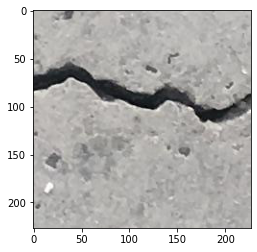

tensor([1])
Predicted class = Positive


In [ ]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name,model):
    image = Image.open(image_name)
    plt.imshow(image)
    plt.show()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    IMAGE_SIZE = 224
    classNmae = [
        "Negative",
        "Positive",
    ]
    transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()])
    ex_img = transform(image)
    model.eval()
    images = ex_img.view(-1, 28*28)
    logits, probas = model(images)
    _, preds = torch.max(probas, 1)
    # print(torch.max(outputs,1))
    print(preds)
    print(f"Predicted class = {classNmae[preds]}")

predict_external_image("/content/drive/MyDrive/Project/extract/Positive/19967.jpg",preTrainedModel)